In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
import pandas as pd
Kayaking= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Kayaking")
Triathlon= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Triathlon")
Fencing= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Fencing")
Athletes= pd.read_excel("V02Max_Combined.xlsx",sheet_name= "Athletes")

Fencing.head()

C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\sonam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,time,RR,VO2,power
0,1,-130.840,672,0.302008,0
1,1,-130.168,672,0.302008,0
2,1,-129.536,632,0.301336,0
3,1,-128.824,712,0.301336,0
4,1,-127.948,876,0.301336,0


Q1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [52]:
df=pd.concat([Kayaking,Triathlon,Fencing])
df


,ID,time,RR,VO2,power
0,11,-168.600,727.0,0.287147,0
1,11,-167.872,728.0,0.287147,0
2,11,-167.148,724.0,0.287147,0
3,11,-166.484,664.0,0.320580,0
4,11,-165.836,648.0,0.320580,0
...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0
27599,10,943.124,424.0,0.786363,0
27600,10,943.552,428.0,0.786363,0
27601,10,943.976,424.0,0.786363,0


In [55]:
df1=pd.DataFrame(Athletes)
df1.head()

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson


In [57]:
df2 = pd.merge(df, df1, on='ID')
df2.head()

,ID,time,RR,VO2,power,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,11,-168.600,727.0,0.287147,0,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
1,11,-167.872,728.0,0.287147,0,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
2,11,-167.148,724.0,0.287147,0,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
3,11,-166.484,664.0,0.320580,0,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
4,11,-165.836,648.0,0.320580,0,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin


2.Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [59]:
df.loc[df['time'] < 0,'ExType']='Warm Up' 
df.loc[(df['time'] >= 0) & (df['power'] > 0), 'ExType'] = 'GET'
df.loc[(df['time'] >= 0) & (df['power'] == 0), 'ExType'] = 'Cool Down'
df

,ID,time,RR,VO2,power,ExType
0,11,-168.600,727.0,0.287147,0,Warm Up
1,11,-167.872,728.0,0.287147,0,Warm Up
2,11,-167.148,724.0,0.287147,0,Warm Up
3,11,-166.484,664.0,0.320580,0,Warm Up
4,11,-165.836,648.0,0.320580,0,Warm Up
...,...,...,...,...,...,...
27598,10,942.700,428.0,0.786363,0,Cool Down
27599,10,943.124,424.0,0.786363,0,Cool Down
27600,10,943.552,428.0,0.786363,0,Cool Down
27601,10,943.976,424.0,0.786363,0,Cool Down


In [ ]:
15.Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
   Zone 1 (recovery/easy) <100 HR max
   Zone 2 (aerobic/base) 100-120 HR max 
   Zone 3 (tempo) 120-135 HR max 
   Zone 4 (lactate threshold) 135-155 HR max 
   Zone 5 (anaerobic) 155+ HR max and above

In [121]:
df['HR']=60/(df['RR']/1000)
df
df.loc[df['HR'] < 100,'ZoneType']='Zone 1'
df.loc[(df['HR'].between(100,120)), 'ZoneType'] = 'Zone 2'
df.loc[(df['HR'].between(121,135)), 'ZoneType'] = 'Zone 3'
df.loc[(df['HR'].between(136,155)), 'ZoneType'] = 'Zone 4'
df.loc[df['HR'] > 155, 'ZoneType'] = 'Zone 5'
df.head()

,ID,time,RR,VO2,power,ExType,HR,Zone Type,ZoneType
0,11,-168.600,727.0,0.287147,0,Warm Up,82.530949,Zone 1,Zone 1
1,11,-167.872,728.0,0.287147,0,Warm Up,82.417582,Zone 1,Zone 1
2,11,-167.148,724.0,0.287147,0,Warm Up,82.872928,Zone 1,Zone 1
3,11,-166.484,664.0,0.320580,0,Warm Up,90.361446,Zone 1,Zone 1
4,11,-165.836,648.0,0.320580,0,Warm Up,92.592593,Zone 1,Zone 1


In [99]:
df2 = pd.merge(df, df1, on='ID')
df2.head()

,ID,time,RR,VO2,power,ExType,HR,Zone Type,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,11,-168.600,727.0,0.287147,0,Warm Up,82.530949,Zone 1,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
1,11,-167.872,728.0,0.287147,0,Warm Up,82.417582,Zone 1,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
2,11,-167.148,724.0,0.287147,0,Warm Up,82.872928,Zone 1,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
3,11,-166.484,664.0,0.320580,0,Warm Up,90.361446,Zone 1,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin
4,11,-165.836,648.0,0.320580,0,Warm Up,92.592593,Zone 1,18,84.8,182,174,268,kayak,Female,African,Isabella,Griffin


Q65:  C([ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29) 30]  Use array slicing to display elements 4,7,10,17.

In [283]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,3])
print(a[1,1])
print(a[1,4])
print(a[3,1])


4
7
10
17


Q66: On average, how long did each participant spend at 200 watts?

In [297]:
#to get the value in dataframe with power = 200 watts
filtered_df = df[df['power'] == 200]
avg_time =filtered_df.groupby("ID")["time"].mean().round(1)
avg_time

ID
3     750.4
4     747.4
5     752.2
6     747.6
9     689.2
10    736.2
11    755.5
12    748.7
13    747.9
14    760.2
15    749.1
16    758.2
18    734.5
Name: time, dtype: float64

Q67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [335]:
kv=Kayaking["VO2"].mean().round(1)
tv=Triathlon["VO2"].mean().round(1)
fv=Fencing["VO2"].mean().round(1)
a= [kv,tv,fv]
print(a)
b=pd.DataFrame(a).max().round(1)
c=b.to_list()
print("Kayaking had the highest average cardiorespiratory fitness in terms of v02 max:", c)
      

[1.8, 1.2, 1.4]
Kayaking had the highest average cardiorespiratory fitness in terms of v02 max: [1.8]


Q68: What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [341]:
#During a workout session 220 - age is used as a benchmark for heart rate zones
df2 = pd.merge(df, df1, on='ID')  #making new data frame by merging all sports data frame and athlete data frame
df2['max_RR']=220-df2['age']      #creating a column which shows Max HR
df3= df2[(df2['HR'])> (df2['max_RR']*.9)]   #exceeded 90% of max HR
df4=df3['ID'].count()                       #records which exceeded 90% of max HR
df5= df['ID'].count()                       # total record
df6= ((df4/df5)*100).round(2)               #percentage calculation
print(df6, " % of athletes exceeded 90% of max HR")


6.91  % of athletes exceeded 90% of max HR


Q69: What was the lowest heart rate recorded at a power wattage of 200

In [343]:
HR = round((60/(filtered_df['RR']/1000)).min(),2)

print("the lowest heart rate recorded at a power wattage of 200: ",HR)

the lowest heart rate recorded at a power wattage of 200:  71.77


Q70: On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [192]:
df7=df2[(df2['HR'])> (df2['max_RR']*.75)]
df8= df7['time'].mean()
print("On Average, most athletes spend",(df8/60).round(2)," min at 75% of MaxHR")

On Average, most athletes spend 12.45  min at 75% of MaxHR


Q71: Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [125]:
df2 = pd.merge(df, df1, on='ID')
pd.crosstab(index=df2.sport, columns= df2.ZoneType)

ZoneType,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5
sport,,,,,
fencing,2258,3700,3723,5979,11321
kayak,1456,2850,3000,4194,6791
triathlon,464,340,1043,812,1781


Q72: Provide an example of a lambda function that multiplies any 2 input values.

In [110]:
v1 =int(input("Please enter your first number: "))
v2=int(input("Please enter your second number: "))
multiply = lambda a, b: a * b
result = multiply(v1, v2)
print(f"The result of multiplying {v1} and {v2} is: {result}")


Please enter your first number:  6
Please enter your second number:  7


The result of multiplying 6 and 7 is: 42


Q73: How long was athlete 17s warm up

In [345]:
a=df.loc[(df['ID'] == 17) & (df['ExType'] == 'Warm Up')]  # to fetch the ID 17 and ExType is warmup
b = a.groupby('ID')['time'].sum().round()
print(b,'sec')


ID
17   -21964.0
Name: time, dtype: float64 sec


Q74: Take a students full name and reverse it using a for loop

In [3]:
def reverse(string):
    string = [string[i] for i in range(len(string)-1, -1, -1)]
    return "".join(string)

Name = str(input("What is your Full Name: "))

print("The original string  is : ", Name)

print("The reversed string(using reversed) is : ", reverse(Name))


What is your Full Name:  SONAM PRIYA


The original string  is :  SONAM PRIYA
The reversed string(using reversed) is :  AYIRP MANOS


Q75: What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [377]:
df2 = pd.merge(df, df1, on='ID')
#filter applied on, time >0(as it is during the test) and next filter is for total records max HR

filter_df = df2[(df2['time']>0) & (df2['HR'] == (df2['HR'].aggregate('max')))]
print(filter_df[['First Name','Last Name', 'sport','HR']])

      First Name Last Name    sport          HR
44041      Grace   Simmons  fencing  238.095238



Q76: np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [33]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[0,1])
print(a[0,4])
print(a[2,2])
print(a[4,4])
print(a[5,4])



2
5
13
25
30


Q77: Display a violin chart to show distribution of VO2Max against age.

<Axes: xlabel='VO2', ylabel='age'>

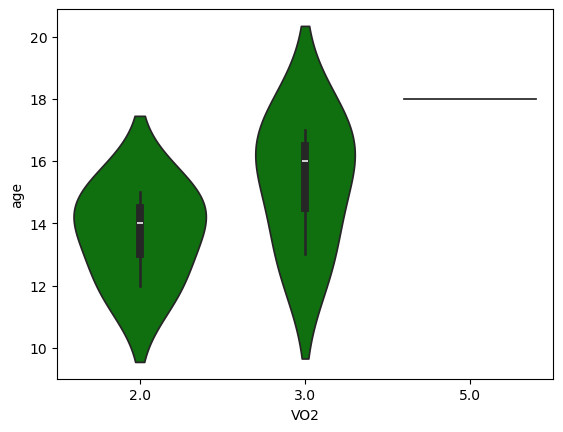

In [267]:
vc=df2.groupby('age')['VO2'].max().round(0)
c=pd.DataFrame(vc)

sns.violinplot(x='VO2', y='age', data=c, color="green")

Q78: Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

In [279]:
#plt.figure(figsize=(8,5))
print(df2.groupby('ZoneType')['ID'].count())
#pd.crosstab(index=df2.sport, columns= df2.ZoneType)
#crash_mx=car_crashes.corr()
#sns.set_context('paper',font_scale=1.4)
#sns.heatmap(crash_mx, annot=True, cmap='BuPu')


ZoneType
Zone 1     4178
Zone 2     6890
Zone 3     7766
Zone 4    10985
Zone 5    19893
Name: ID, dtype: int64


Q79: Plot the Donut chart athlete distrubution by Gender

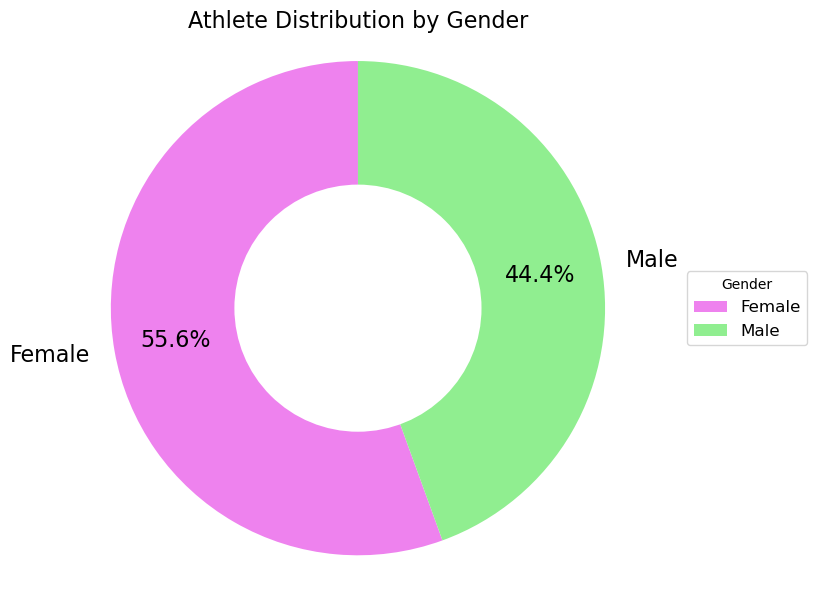

In [269]:
#display(Athletes)
gender_counts = Athletes['Gender'].value_counts()
# Creating donut chart
plt.figure(figsize=(8, 6))
colors = ['Violet', 'lightgreen']  # Lightgreen for male, violet for female
# Creating pie chart further turn into donut
plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors,
        autopct=lambda pct: f'{pct:.1f}%', # This function will be used to format the percentage
        startangle=90, pctdistance=0.75,
        textprops={'fontsize': 16})  # Increase font size of percentage labels
# Creating a circle at the center to make it a donut chart
center_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
# ensuring that pie is drawn as a circle
plt.axis('equal')
plt.title("Athlete Distribution by Gender", fontsize=16)
# Adding legend
plt.legend(gender_counts.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.tight_layout()
plt.show()

In [259]:
m=pd.DataFrame(Athletes)
plt.style.use("default")
a = m['Gender']
b = m['ID']
b

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
Name: ID, dtype: int64


Q80: Find the size of Tuple for any given input

In [124]:
values =input("Please insert new item: ")
new_values =values.split(",")
a_tuple= tuple(new_values)
print(a_tuple)
print("size of tuple is ", len(a_tuple))

Please insert new item:  5,7,3


('5', '7', '3')
size of tuple is  3
